In [3]:
import pandas as pd

In [ ]:
train_df = pd.read_csv('target_pairs.csv')

# Filter rows where 'pair' splits into exactly two elements

mask = train_df['pair'].apply(lambda x: len(x.split(' - ')) == 2)
train_df_pairs = train_df[mask].copy()
train_df_pairs['thing_1'] = train_df_pairs['pair'].apply(lambda x: x.split(' - ')[0])
train_df_pairs['thing_2'] = train_df_pairs['pair'].apply(lambda x: x.split(' - ')[1])

# Display the filtered DataFrame
train_df_pairs

,target,lag,pair,thing_1,thing_2
1,target_1,1,LME_PB_Close - US_Stock_VT_adj_close,LME_PB_Close,US_Stock_VT_adj_close
2,target_2,1,LME_CA_Close - LME_ZS_Close,LME_CA_Close,LME_ZS_Close
3,target_3,1,LME_AH_Close - LME_ZS_Close,LME_AH_Close,LME_ZS_Close
4,target_4,1,LME_AH_Close - JPX_Gold_Standard_Futures_Close,LME_AH_Close,JPX_Gold_Standard_Futures_Close
5,target_5,1,LME_ZS_Close - JPX_Platinum_Standard_Futures_C...,LME_ZS_Close,JPX_Platinum_Standard_Futures_Close
...,...,...,...,...,...
419,target_419,4,FX_NOKUSD - LME_AH_Close,FX_NOKUSD,LME_AH_Close
420,target_420,4,JPX_Gold_Standard_Futures_Close - US_Stock_RY_...,JPX_Gold_Standard_Futures_Close,US_Stock_RY_adj_close
421,target_421,4,US_Stock_EWT_adj_close - LME_AH_Close,US_Stock_EWT_adj_close,LME_AH_Close
422,target_422,4,JPX_Platinum_Standard_Futures_Close - FX_NOKCHF,JPX_Platinum_Standard_Futures_Close,FX_NOKCHF


In [2]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load datasets
features_df = pd.read_csv('train.csv')
labels_df = pd.read_csv('train_labels.csv')

# Merge on date_id
data = pd.merge(features_df, labels_df[['date_id', 'target_0']], on='date_id')

# Prepare features and target
X = data.drop(['date_id', 'target_0'], axis=1)
y = data['target_0']

# Skip rows with NaN values
mask = X.notnull().all(axis=1) & y.notnull()
X = X[mask]
y = y[mask]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Train XGBoost model
model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.0001


C:\Users\sabat\AppData\Local\Temp\ipykernel_10408\2759901140.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(scores), y=list(features), orient='h', palette='viridis')


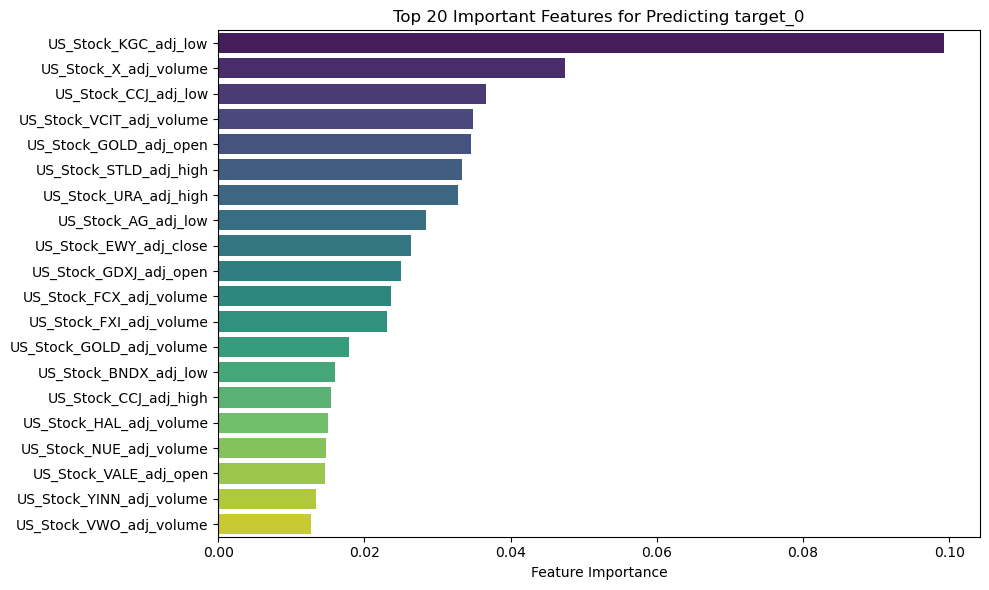

In [3]:
# Show the 20 most important features as a bar graph using seaborn
importances = model.feature_importances_
feature_names = X.columns
important_features = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)[:20]

# Prepare data for plotting
features, scores = zip(*important_features)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x=list(scores), y=list(features), orient='h', palette='viridis')
plt.xlabel('Feature Importance')
plt.title('Top 20 Important Features for Predicting target_0 in XGBoost')
plt.tight_layout()
plt.show()